In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import lognorm

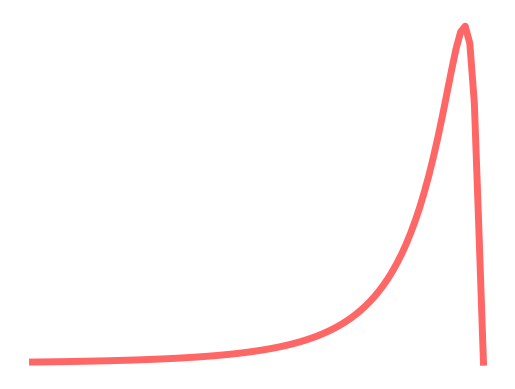

In [11]:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

x = np.linspace(lognorm.ppf(0.00001, s),lognorm.ppf(0.99, s), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(np.flip(x)/10, lognorm.pdf(x, s),'r-', lw=5, alpha=0.6, label='lognorm pdf')
plt.xticks([])
plt.yticks([])
ax.axis('off')
plt.show()

# plot points from a bivariate normal distribution

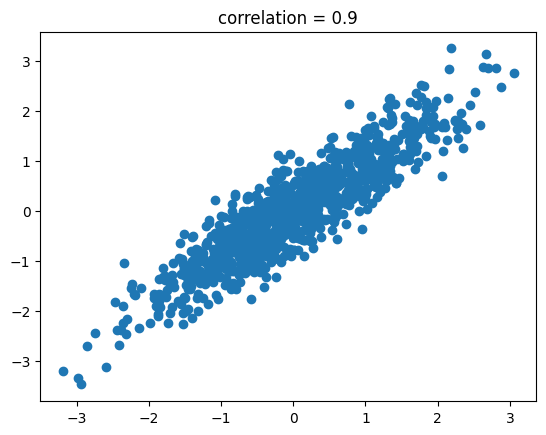

In [12]:
def bivariate_normal(rho, n):
    """
    sample points from a bivariate normal distribution
    inputs: rhos=correlation, n=number of points
    """
    z1 = [normal() for i in range(n)]
    z2 = [normal() for i in range(n)]
    e1 = z1
    rho2 = math.sqrt(1 - pow(rho, 2))
    e2 = [rho * e1 + rho2 * e2 for e1, e2 in zip(z1, z2)]
    return e1, e2 

correlation = .9
e1, e2 = bivariate_normal(correlation, 1000)
plt.scatter(e1,e2)
plt.title(f'correlation = {correlation:0.4}')
plt.show()

# define 2 univariate distributions

In [13]:
class univariate():
    """univariate distribution, cumulative and inverse"""
    def __init__(self, fcn):
        self.a, self.b, self.steps = -3,3,1000
        self.fcn = fcn
        self.x = np.linspace(self.a, self.b, self.steps)
        self.integral = pd.DataFrame([self.x, self.fcn(self.x)], index=['input','output']).transpose()
        self.integral['integral'] = np.cumsum(np.array(self.integral['output']))*(self.x[1]-self.x[0])

    def get_value(self, x):
        return self.fcn(x)
    
    def get_inverse(self, y):
        i = np.searchsorted(self.integral['integral'][:-1], y) ### exclude top most point  ##
        return float(self.integral['input'].iloc[i])

def plot_dist(g, function_name):
    x = np.linspace(-1, 2, 1000)
    out = pd.DataFrame([x, g(x)], index=['input','output']).transpose()
    fig, ax = plt.subplots(figsize=(18,5))
    plt.subplot(1,2,1)
    plt.plot(out['input'], out['output'], lw=5)
    plt.title(f'function {function_name} density')
    plt.subplot(1,2,2)
    plt.plot(x, np.cumsum(np.array(out['output']))*(x[1]-x[0]), lw=5)
    plt.title(f'function {function_name} distribution')
    plt.show()
    
def plot_2_dists(gs, function_names):
    plt.figure(figsize=(18,7))
    for i, (g, function_name) in enumerate(zip(gs, function_names)):
        x = np.linspace(-1, 2, 1000)
        out = pd.DataFrame([x, g(x)], index=['input','output']).transpose()
        plt.subplot(1,2,i+1)
        plt.plot(out['input'], out['output'], lw=5)
        plt.title(f'function {function_name} density', fontsize=15)
    plt.show()

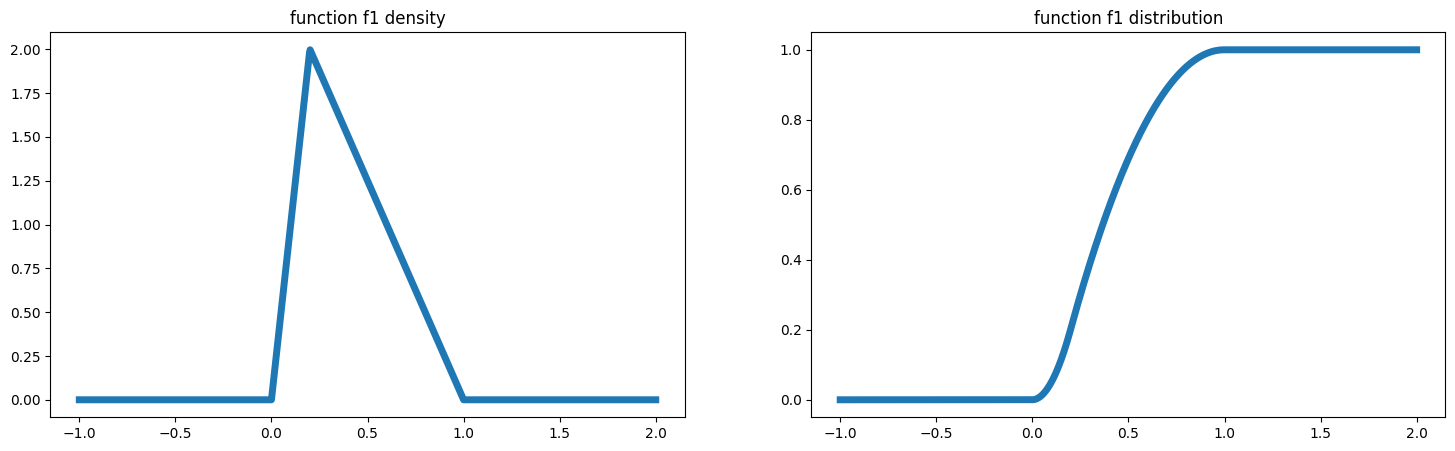

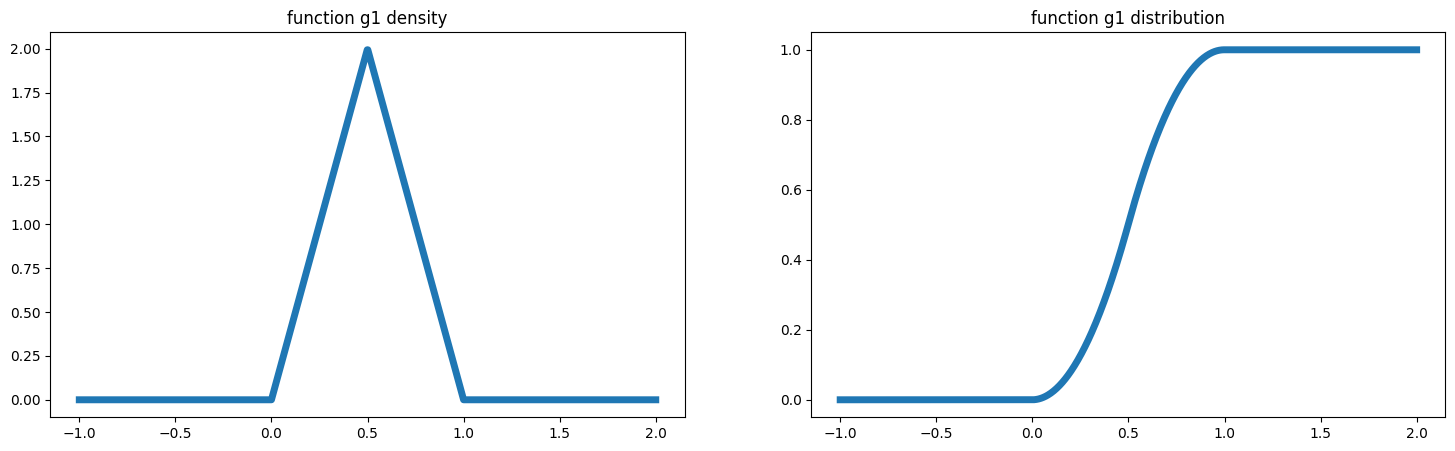

In [14]:
# def f(x):
#     return np.piecewise(x, [x < 0, x >= 0, x > 1.0], 
#                         [0, lambda x: x, 0]) / .5
# def g(x):
#     return np.piecewise(x, [x < 0, x >= 0, x >= 0.5, x > 1.5], 
#                         [0, lambda x: x, lambda x: .5 - (x - 0.5) * 0.5, 0]) / .375
def f(x):
    return np.piecewise(x, [x < 0, x >= 0, x >=0.2, x > 1.0], 
                        [0, lambda x: 10 * x, lambda x: 2 - 2.5 * (x - 0.2),  0])
def g(x):
    return np.piecewise(x, [x < 0, x >= 0, x >= 0.5, x > 1.0], 
                        [0, lambda x: 4 * x, lambda x: 2 - 4 * (x - 0.5), 0])


plot_dist(f, 'f1')
plot_dist(g, 'g1')

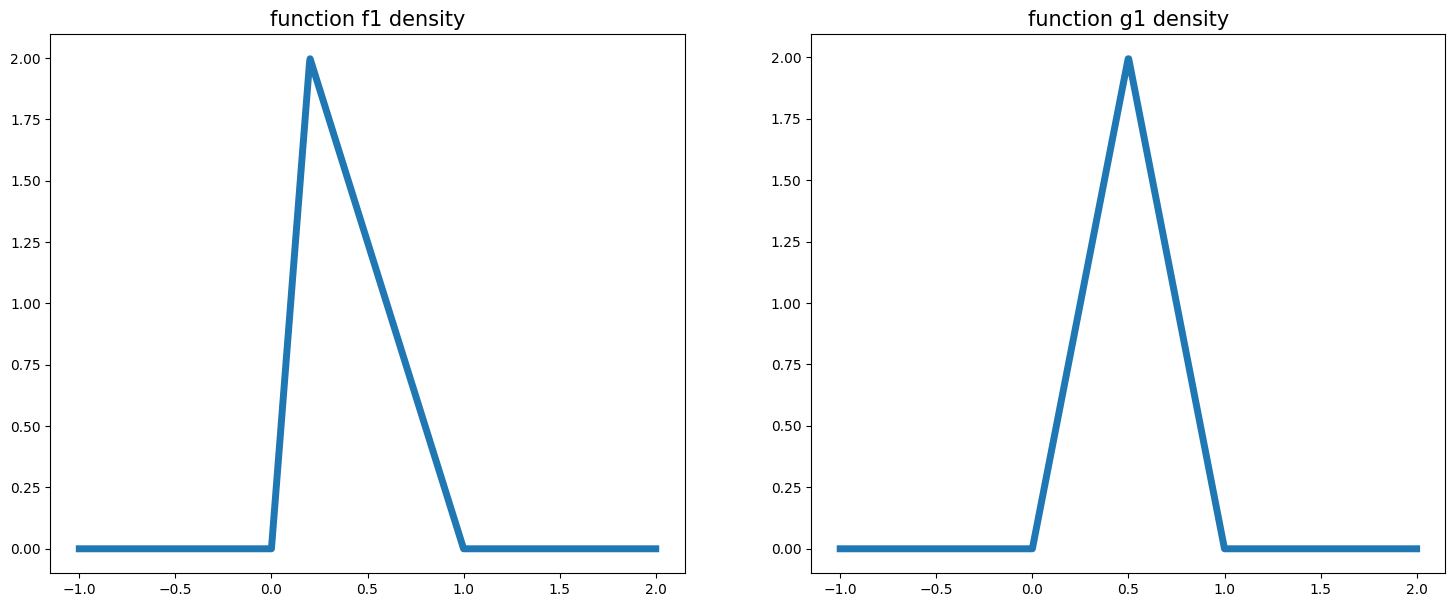

In [15]:
plot_2_dists((f,g), ('f1','g1'))

In [16]:
fcn_f = univariate(f)
fcn_g = univariate(g)

# create copula distribution

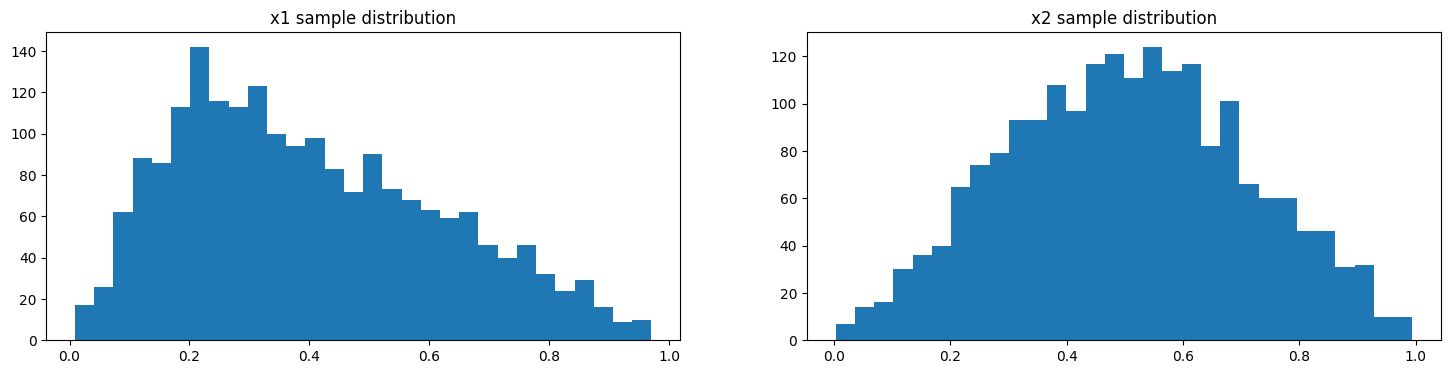

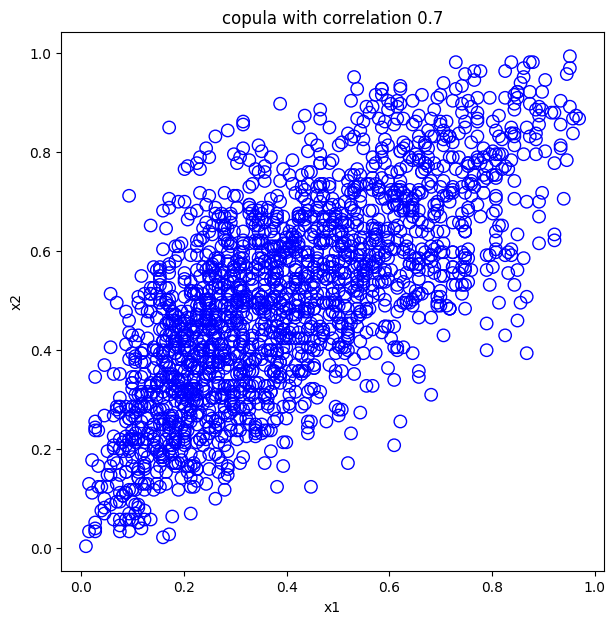

In [17]:
from scipy.stats import norm
from scipy.optimize import bisect

correlation = .7
e1, e2 = bivariate_normal(correlation, 2000)
x1 = [fcn_f.get_inverse(norm.cdf(e)) for e in e1]
x2 = [fcn_g.get_inverse(norm.cdf(e)) for e in e2]

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.hist(x1,30)
plt.title('x1 sample distribution')
plt.subplot(1,2,2)
plt.hist(x2,30)
plt.title('x2 sample distribution')
plt.show()

plt.figure(figsize=(7,7))
# plt.plot(x1,x2, 'o')
plt.scatter(x1, x2, s=80, facecolors='none', edgecolors='blue')
plt.title(f'copula with correlation {correlation}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# elliptical distributions

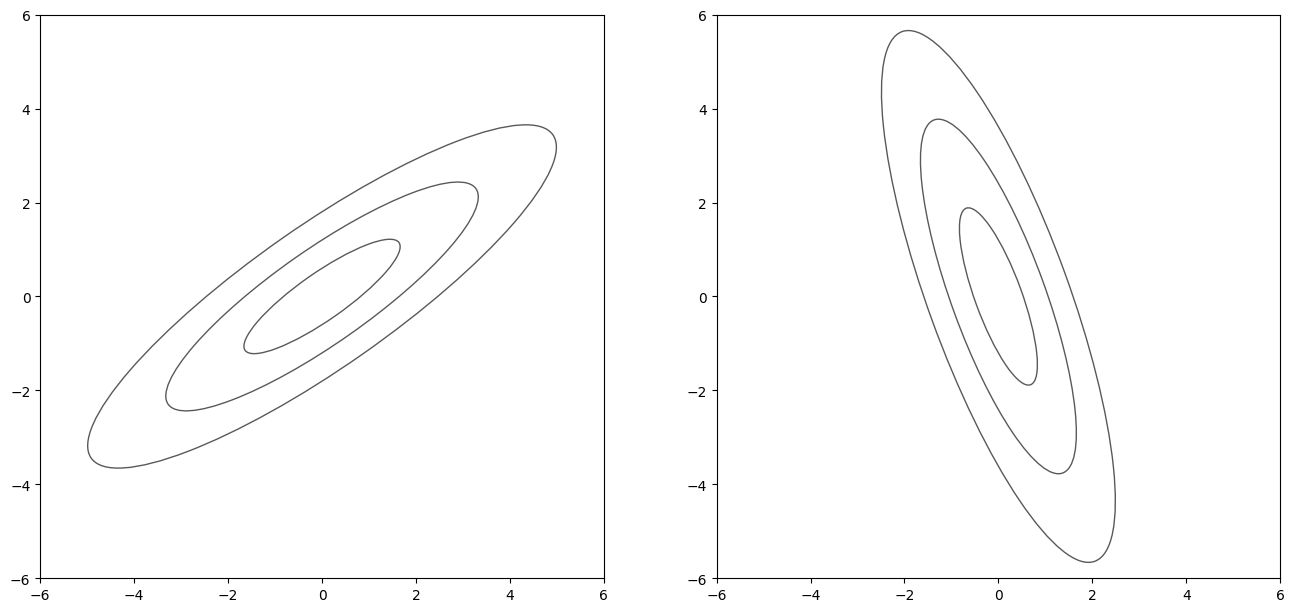

In [18]:
from matplotlib.patches import Ellipse

# plt.figure(figsize=(10,20))
fig1, ax1 = plt.subplots(1,2, figsize=(16,20), subplot_kw={'aspect': 'equal'})

for i, a in enumerate((35,110)):
    for j in range(3,0,-1):
        e = Ellipse(xy=(0,0), width=4 * j, height=j, angle=a, alpha=.65, facecolor='white', edgecolor='black')
        ax1[i].add_artist(e)

    rng = 6
    ax1[i].set_xlim(-rng, rng)
    ax1[i].set_ylim(-rng, rng)
plt.show()